# Continuous Control with 1 Agent

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

#### Loading the Environment

* **01 AGENTS Environment:** `Reacher_01_Windows_x86_64/Reacher.exe`
* **20 AGENTS Environment:** `Reacher_20_Windows_x86_64/Reacher.exe`

The only difference between ths 1 agent and the 20 agent notebooks is calling the equivalent environment path. Everything else is (including hyperparams and neural network architectures) are totally identical.

In [2]:
UNITY_PATH_01_AGENTS = 'Reacher_01_Windows_x86_64/Reacher.exe'
UNITY_PATH_20_AGENTS = 'Reacher_20_Windows_x86_64/Reacher.exe'

env = UnityEnvironment(file_name = UNITY_PATH_01_AGENTS)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 1
Size of each action: 4
There are 1 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726671e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Take Actions on the Environment (Play the game)

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

The bellow cell defines a function called `play_game` which executes agent(s) actions at the environment by either choosing random actions or choosing actions based on the actor neural network estimations. 

There are two playing modes. One is choosing random actions (`random_actions=True`) and the other is by choosing actions based on the actor neural network (`random_actions=False`).

In [5]:
def play_game(random_actions=True):
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        if random_actions:
            actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
            actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        else:
            actions = agent.act(states, add_noise=False)       # no noise when playing demo game ;)
        env_info = env.step(actions)[brain_name]               # send all actions to tne environment
        next_states = env_info.vector_observations             # get next state (for each agent)
        rewards = env_info.rewards                             # get reward (for each agent)
        dones = env_info.local_done                            # see if episode finished
        scores += env_info.rewards                             # update the score (for each agent)
        states = next_states                                   # roll over states to next time step
        
        print('\rReal time score (averaged over {} agents) for this episode: {}'.
              format(num_agents, np.mean(scores)), end="")
        
        if np.any(dones):                                      # exit loop if episode finished
            break

    print('\rFinal Reacher Score (averaged over {} agents) for this episode: {}'.
              format(num_agents, np.mean(scores)), end="")

#### Play a random game
Lets play a random game by selecting random actions for each state and see how it goes. Keep in mind that the score should be normally zero, or slightly positive if by "accident" the mechanical arm touches the ball using random actions.

In [6]:
play_game(random_actions=True)

Final Reacher Score (averaged over 1 agents) for this episode: 0.19999999552965164

### 4. Time to put some intelligence in action

Now it's time to train our agent to solve the environment!  When training the environment, we set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

We will be importing the model found at `model.py` and the agent found at `ddpg_agent.py` files.

In [7]:
from ddpg_agent import Agent
from collections import namedtuple, deque
import torch

print("state_size",state_size)
print("action_size",action_size)

agent = Agent(state_size=state_size, action_size=action_size, random_seed=5)

state_size 33
action_size 4


#### Play a game on untrained network

We have an intelligent architecture, but despite the sophistication of the architecture, the neural networks weights are just random. Such a setup, but with random weights should give similar results to the "random actions".  Sad, but true.

Lets play a game, but this time using our neural network that (for now) has untrained weights. So let's now watch an untrained agent.

In [8]:
play_game(random_actions=False)

Final Reacher Score (averaged over 1 agents) for this episode: 0.0

### Training the Agent 

**We will use a  Deep Deterministic Policy Gradients (DDPG) algorithm**

We will be working with full episode trajectories.

At each episode we will be executing agent actions by calling `agent.act` and wee will be saving SARS results to the memory. 

Instead of updating the actor and critic networks 1 or 20 times at every timestep (depending on the actors count), we amended the code to update the networks **10 times** after every **20 timesteps**. This provided much better stability during training.

We will be returning two lists containing scores.
* `avg_episode_scores` will return the average actors score for each distinct episode
* `avg_100deque_scores` will return the average actors score over the last 100 episodes

The method will terminate after 1000 episodes, or when the `avg_100deque_scores` accumulates score of 30 or more for the last 100 episodes.

If the method terminates by accumulating score of 30 or more at the `avg_100deque_scores` we will be saving a file containing the weights checkpoint for the `actor` and the `critic` neural networks.

In [9]:
NUM_UPDATES  = 10 # update the network 10 times
UPDATE_EVERY = 20 # after every 20 timesteps 

def ddpg(n_episodes=1000, print_every=10, average_per_x_episodes=100):
    print('Approach using {} agents: '.format(num_agents))
    
    scores_deque = deque(maxlen=average_per_x_episodes)      # populated by 100 episodes (for mean of 100 episodes)
    avg_episode_scores = [] 
    avg_100deque_scores = []
    
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]    # reset the environment
        agent.reset()
        scores = np.zeros(num_agents)       
        states = env_info.vector_observations                # get the current state (for each agent)
        count = 0     

        while True:
            count += 1
            actions = agent.act(states, add_noise=True)
            env_info = env.step(actions)[brain_name]         # send all actions to the environment
            next_states = env_info.vector_observations       # get next state (for each agent)
            rewards = env_info.rewards                       # get reward (for each agent)
            dones = env_info.local_done                      # see if episode finished

            # Store the SARS to the memory
            for i in range(0, num_agents):
                agent.add_sars_to_memory(states[i], actions[i], rewards[i], next_states[i], dones[i])

            # After 20 steps, make 10 updates
            agent.learn_by_memory(current_step=count, update_every_x_steps=UPDATE_EVERY, num_of_updates=NUM_UPDATES)
             
            scores += rewards
            states = next_states
            if np.any(dones):
                break

        score = np.mean(scores)            # the score of the episode will be the average of all agent's scores
        scores_deque.append(score)         # add the score to the 100 episodes deque
        
        avg_episode_scores.append(score)    # add the score to the total episodes deque
        avg_100deque_scores.append(np.mean(scores_deque))

        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)), end="")
        if i_episode % print_every == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
        if np.mean(scores_deque) >= 30.0:
            print('\n Environment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor_1_agent.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic_1_agent.pth')
            break   
    return avg_episode_scores, avg_100deque_scores

In [10]:
avg_episode_scores, avg_100deque_scores = ddpg()

Approach using 1 agents: 
Episode 10	Average Score: 0.70
Episode 20	Average Score: 0.93
Episode 30	Average Score: 1.12
Episode 40	Average Score: 1.34
Episode 50	Average Score: 1.61
Episode 60	Average Score: 1.83
Episode 70	Average Score: 2.25
Episode 80	Average Score: 2.31
Episode 90	Average Score: 2.59
Episode 100	Average Score: 2.75
Episode 110	Average Score: 3.22
Episode 120	Average Score: 3.69
Episode 130	Average Score: 4.62
Episode 140	Average Score: 5.78
Episode 150	Average Score: 7.12
Episode 160	Average Score: 8.34
Episode 170	Average Score: 9.62
Episode 180	Average Score: 10.69
Episode 190	Average Score: 12.38
Episode 200	Average Score: 13.72
Episode 210	Average Score: 15.21
Episode 220	Average Score: 16.63
Episode 230	Average Score: 17.70
Episode 240	Average Score: 18.65
Episode 250	Average Score: 20.31
Episode 260	Average Score: 21.90
Episode 270	Average Score: 23.04
Episode 280	Average Score: 24.62
Episode 290	Average Score: 25.38
Episode 300	Average Score: 26.50
Episode 31

#### Plot the scores

The bellow function takes a list and plots it

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_list(list):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(np.arange(1, len(list)+1), list)
    plt.ylabel('Score')
    plt.xlabel('Episode #')
    plt.show()

#### List: Print the mean score per 100 episodes

Print the deque results of the mean based on the last 100 episodes all the way from the first episode to the last, and then plot these results

[0.25999999418854713, 0.4899999890476465, 0.7599999830126762, 0.6824999847449362, 0.6859999846667051, 0.6616666518772641, 0.6871428417840174, 0.6862499846611172, 0.7199999839067459, 0.704999984242022, 0.6445454401387409, 0.7424999834038317, 0.7023076766098921, 0.6878571274823376, 0.7186666506032149, 0.7568749830825254, 0.7752941003178849, 0.8011110932048824, 0.8715789278871134, 0.9314999791793526, 0.9066666464010874, 0.9813636144284498, 1.1043478014028592, 1.0899999756366014, 1.069599976092577, 1.0661538223234506, 1.0696296057215444, 1.0474999765865505, 1.0899999756366014, 1.116333308381339, 1.1264515877250703, 1.1665624739252962, 1.1906060339939413, 1.1929411498062752, 1.2071428301611118, 1.2769444159025118, 1.2737837553124975, 1.2676315506135947, 1.290256381416932, 1.3379999700933696, 1.3212194826635646, 1.3711904455419808, 1.4211627589322107, 1.4318181498145515, 1.469111078273919, 1.4815217060158434, 1.5180850724511323, 1.5616666317606966, 1.586734658411267, 1.6143999639153481, 1.62

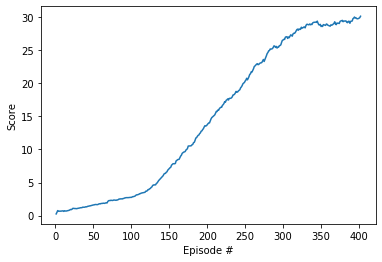

In [12]:
print(avg_100deque_scores)
plot_list(avg_100deque_scores)

#### List: Print the mean score per episodes

Print the list with the results of the mean agents score per episode, all the way from the first episode to the last, and then plot these results

[0.25999999418854713, 0.7199999839067459, 1.2999999709427357, 0.4499999899417162, 0.6999999843537807, 0.5399999879300594, 0.8399999812245369, 0.6799999848008156, 0.9899999778717756, 0.5699999872595072, 0.03999999910593033, 1.81999995931983, 0.2199999950826168, 0.4999999888241291, 1.149999974295497, 1.3299999702721834, 1.0699999760836363, 1.2399999722838402, 2.1399999521672726, 2.0699999537318945, 0.40999999083578587, 2.5499999430030584, 3.8099999148398638, 0.7599999830126762, 0.5799999870359898, 0.979999978095293, 1.1599999740719795, 0.4499999899417162, 2.2799999490380287, 1.8799999579787254, 1.4299999680370092, 2.4099999461323023, 1.959999956190586, 1.269999971613288, 1.6899999622255564, 3.7199999168515205, 1.1599999740719795, 1.0399999767541885, 2.149999951943755, 3.1999999284744263, 0.6499999854713678, 3.419999923557043, 3.519999921321869, 1.889999957755208, 3.109999930486083, 2.0399999544024467, 3.1999999284744263, 3.609999919310212, 2.7899999376386404, 2.969999933615327, 2.2099999

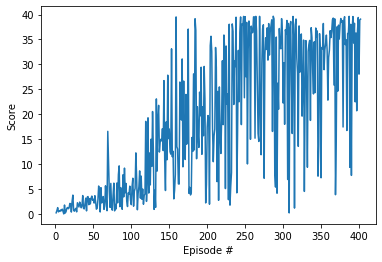

In [13]:
print(avg_episode_scores)
plot_list(avg_episode_scores)

#### Load the weights checkpoints for the neural networks

Incase you want to use the resulted weights based on visualization of the data above, please do run the cell bellow to restore the weights configurations for the actor and critic neural networks.

In [14]:
agent.actor_local.load_state_dict(torch.load('checkpoint_actor_1_agent.pth'))
agent.critic_local.load_state_dict(torch.load('checkpoint_critic_1_agent.pth'))

#### Play a game on trained network - Watch a smart agent
We will play again the game using the neural network, but this time based on the trained neural networks. Now, lets watch a "smart agent"!

In [15]:
play_game(random_actions=False)

Final Reacher Score (averaged over 1 agents) for this episode: 36.11999919265509

#### Terminate the Unity environment

Call the `env.close` to terminate the unity environment

In [16]:
env.close()

### 5. Further Refinements

It appears that the DDPG algorithm is heavily dependant on the hyperparameters, and even slight changes can produce way different results, especially when using the 1 Agent approach.

Utilizing the PPO or A3C instead could possibly provide more stable results during training.